In [1]:
import sunpy.map
from astropy.utils.data import download_file

#cube_file = download_file("http://data.sunpy.org/CRISP_LXY_Cube.fits.gz", cache=True)
#cube_file = download_file("http://data.sunpy.org/CRISP_TXY_Cube.fits.gz", cache=True)

In [10]:
cube_file

'/home/drew/.astropy/cache/download/6e56a21864a7a489a3c6fdf872e26727'

In [2]:
spectralcube = sunpy.map.Map('../data/cubefile.fits.gz')

In [12]:
spectralcube.data.shape

(32, 1019, 1019)

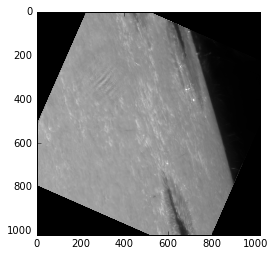

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(spectralcube.data[0, ...], cmap='gray')
plt.show()

In [4]:
spectralcube.reference_pixel

Pair(x=<Quantity 0.0 pix>, y=<Quantity 509.0 pix>)

In [5]:
# take a slit in the data
slit = spectralcube.data[:, :, 509]
slit.shape

(32, 1019)

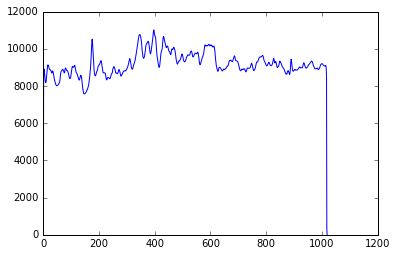

In [23]:
plt.plot(slit[0])
plt.show()

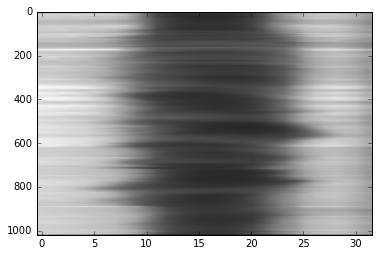

In [17]:
plt.imshow(slit.T, aspect='auto', cmap='gray')
plt.show()

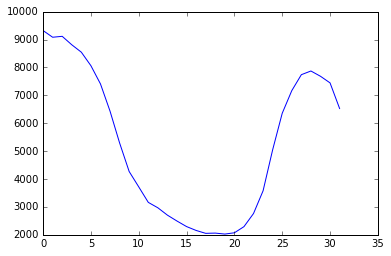

In [56]:
lightcurve = slit[:, 509]
plt.plot(lightcurve)
plt.show()

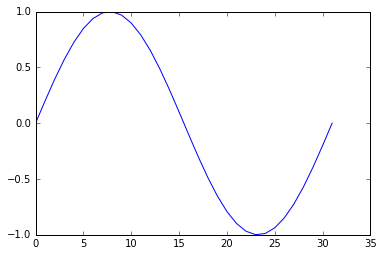

[  0.00000000e+00   2.01298520e-01   3.94355855e-01   5.71268215e-01
   7.24792787e-01   8.48644257e-01   9.37752132e-01   9.88468324e-01
   9.98716507e-01   9.68077119e-01   8.97804540e-01   7.90775737e-01
   6.51372483e-01   4.85301963e-01   2.99363123e-01   1.01168322e-01
  -1.01168322e-01  -2.99363123e-01  -4.85301963e-01  -6.51372483e-01
  -7.90775737e-01  -8.97804540e-01  -9.68077119e-01  -9.98716507e-01
  -9.88468324e-01  -9.37752132e-01  -8.48644257e-01  -7.24792787e-01
  -5.71268215e-01  -3.94355855e-01  -2.01298520e-01  -2.44929360e-16]
[ -2.35922393e-16   1.54057755e+00  -1.37671383e-01  -1.14564509e-01
  -1.08212113e-01  -1.05508911e-01  -1.04101230e-01  -1.03275716e-01
  -1.02752612e-01  -1.02403271e-01  -1.02161722e-01  -1.01991385e-01
  -1.01870801e-01  -1.01786917e-01  -1.01731684e-01  -1.01700263e-01
  -1.01690061e-01]
[ 0.          0.05882353  0.11764706  0.17647059  0.23529412  0.29411765
  0.35294118  0.41176471  0.47058824 -0.47058824 -0.41176471 -0.35294118
 -0.29

/home/drew/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


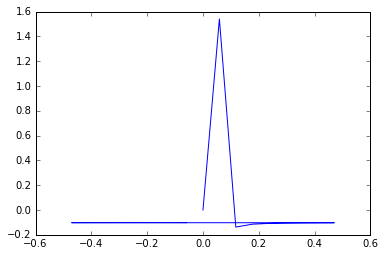

In [65]:
import numpy as np

#lightcurve = np.sin(np.linspace(0, 2*np.pi, 32))
plt.plot(lightcurve)
plt.show()

spectrum = np.fft.rfft(lightcurve)
print(lightcurve)
print(spectrum.real)
freq = np.fft.fftfreq(spectrum.shape[0])
print(freq)
print(freq.shape, spectrum.shape)
plt.plot(freq, spectrum)
plt.show()

In [63]:
np.fft.rfft?